# Prediksi Harga Rumah Kalifornia

**Latar Belakang:**
Pada tahun 1990, sensus di California menyediakan data kaya tentang karakteristik rumah-rumah di berbagai distrik. Informasi ini menjadi sangat berharga untuk memahami faktor-faktor yang memengaruhi harga rumah di wilayah tersebut. Dengan kemajuan teknologi dan metode analisis data, kita dapat menggunakan data tersebut untuk membangun model prediksi harga rumah, yang dapat memberikan wawasan berharga bagi pembeli, penjual, dan pemangku kepentingan lainnya di pasar perumahan California.

**Tujuan:**
Tujuan proyek ini adalah memprediksi harga rumah di California berdasarkan berbagai fitur yang diberikan. Dengan melakukan hal ini, kita dapat memberikan estimasi harga yang akurat kepada individu atau pihak yang berkepentingan dalam transaksi properti di California.



# 1. Business Problem Understanding

Masalah bisnis yang ingin kita selesaikan adalah menciptakan model prediksi harga rumah yang akurat. Dengan demikian, kita dapat memberikan panduan harga yang baik bagi mereka yang terlibat dalam transaksi properti di California. Hal ini akan membantu pembeli dan penjual membuat keputusan yang lebih informasional dan meminimalkan ketidakpastian yang terkait dengan nilai properti.


# 2. Data Understanding

## 2.1 Metadata

1. **longitude:** Koordinat geografis bujur rumah.
2. **latitude:** Koordinat geografis lintang rumah.
3. **housing_median_age:** Umur median rumah di distrik tertentu.
4. **total_rooms:** Jumlah total kamar di rumah-rumah distrik.
5. **total_bedrooms:** Jumlah total kamar tidur di rumah-rumah distrik.
6. **population:** Jumlah populasi di distrik tersebut.
7. **households:** Jumlah rumah tangga di distrik tersebut.
8. **median_income:** Pendapatan median rumah tangga di distrik tersebut.
9. **ocean_proximity:** Kedekatan rumah dengan lautan (variabel kategorikal).
10. **median_house_value:** Nilai median rumah di distrik tersebut (variabel target).

**Singkatnya:**
Data ini berisi informasi geografis dan statistik sensus tahun 1990 untuk rumah-rumah di distrik California. Fitur-fiturnya melibatkan lokasi, umur median rumah, jumlah kamar, populasi, pendapatan median, dan kedekatan dengan lautan, dengan tujuan memprediksi nilai median rumah di distrik tersebut.

## 2.2 Import Library

In [49]:
# Jika belum menginstall, silahkan diinstall terlebih dahulu
# !pip install pandas
# !pip install numpy
# !pip install seaborn
# !pip install matplotlib

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
from collections import Counter
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.svm import SVR


## 2.3 Load Data

In [51]:
data = pd.read_csv('data_california_house.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


Dengan .info() dapat diketahui bahwa data terdiri dari 14448  data dengan 10 kolom. Setiap kolom sudah memiliki tipe data yang sesuai kecuali ocean_proximity.     

In [53]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14448.000000,14448.000000,14448.000000,14448.000000,14311.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,-119.566647,35.630093,28.618702,2640.132683,538.260709,1425.157323,499.508929,3.866667,206824.624516
std,2.006587,2.140121,12.596694,2191.612441,423.577544,1149.580157,383.098390,1.891158,115365.476182
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1451.000000,295.000000,784.000000,279.000000,2.570600,119600.000000
50%,-118.490000,34.260000,29.000000,2125.000000,435.000000,1165.000000,410.000000,3.539100,180000.000000
75%,-118.000000,37.710000,37.000000,3148.000000,647.000000,1724.000000,604.000000,4.736100,263900.000000
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Dengan menggunakan fungsi describe() dapat diketahui statistika deskripsi dari setiap kolom yang bertipe data integer. Dari hasil diatas dapat dilihat rentang nilai setiap kolom berbeda sehingga nanti nya kita harus menormalisasikannya.

# 3. Data Preprocessing

Tahap data preprocessing (pra-pemrosesan data) adalah serangkaian langkah atau proses yang dilakukan pada data mentah sebelum data tersebut digunakan untuk analisis atau pembuatan model. Tujuan dari tahap ini adalah untuk membersihkan, mempersiapkan, dan menyusun data sehingga dapat diolah dengan lebih baik dan menghasilkan hasil yang lebih akurat dan bermakna.

In [54]:
# Check the percentage of Nan in dataset
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data['total_rooms'].count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(15)

,Total,Percent
total_bedrooms,137,0.009482
longitude,0,0.000000
latitude,0,0.000000
housing_median_age,0,0.000000
total_rooms,0,0.000000
population,0,0.000000
households,0,0.000000
median_income,0,0.000000
ocean_proximity,0,0.000000
median_house_value,0,0.000000


Menggunakan  fungsi isnull().sum() dapat ditampilkan total missing value dari setiap kolom. Dari hasil diatas dapat diketahui terdapat 1 kolom yang memiliki missing value  yaitu kolom total_bedrooms (137 record data)

In [55]:
# Check duplicated values:
print('df duplicated values: ',data.duplicated().sum())
# Check the features with 0 value
zero_counts = data.eq(0).sum()
print('df zero values:\n', zero_counts)
print('======================================')
print(data.shape)

df duplicated values:  0
df zero values:
 longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64
(14448, 10)


## 3.1 Handling missing value pada kolom total_bedrooms

Kita ketahui terdapat missing value pada kolom `total_bedrooms` sehingga perlu diatasi. Sebelum itu kita perlu melihat distribusi dari kolom tersebut.

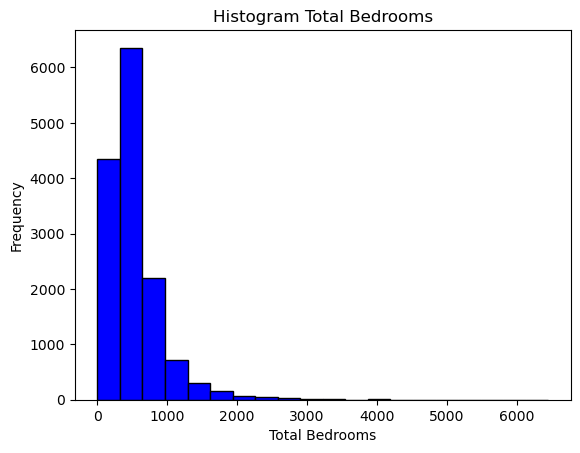

In [56]:
plt.hist(data['total_bedrooms'], bins=20, color='blue', edgecolor='black')
plt.title('Histogram Total Bedrooms')
plt.xlabel('Total Bedrooms')
plt.ylabel('Frequency')
plt.show()

Dari histogram total bedrooms diatas dapat diketahui bahwa data tidak berdistribusi normal dan skewness positif. Oleh karena itu kita akan mengatasi missing value  dengan nilai median dari data tersebut.

In [57]:
# Handling missing values on total_bedrooms
median_value = data['total_bedrooms'].median()
data['total_bedrooms'].fillna(median_value, inplace=True)

## 3.2 Encoding Kategori Ocean Proximity

In [58]:
data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     6369
INLAND        4576
NEAR OCEAN    1879
NEAR BAY      1622
ISLAND           2
Name: count, dtype: int64

In [59]:
data['Encoded_ocean_proximity'] = data['ocean_proximity'].map({'<1H OCEAN': 1, 'INLAND': 2, 'NEAR OCEAN': 3,
                                                         'NEAR BAY': 4, 'ISLAND': 5 })

Dengan membuat kolom baru yang disebut 'Encoded_ocean_proximity', kita mengonversi variabel kategorikal 'ocean_proximity' menjadi bentuk numerik agar dapat digunakan dalam proses pemodelan. Pengkodean ini memberikan representasi numerik untuk setiap kategori ocean_proximity, dengan tujuan agar algoritma machine learning dapat memahami dan memproses informasi tersebut. Contohnya, kita mengaitkan nilai 1 dengan '<1H OCEAN', 2 dengan 'INLAND', 3 dengan 'NEAR OCEAN', 4 dengan 'NEAR BAY', dan 5 dengan 'ISLAND'. Dengan langkah ini, kita memfasilitasi model dalam memahami hubungan dan pola yang mungkin ada antara kedekatan dengan lautan dan nilai median rumah, yang dapat meningkatkan kinerja model pada tahap pemodelan.

In [60]:
data['Encoded_ocean_proximity'].value_counts()

Encoded_ocean_proximity
1    6369
2    4576
3    1879
4    1622
5       2
Name: count, dtype: int64

In [61]:
# Drop ocean_proximity column
column_to_drop = 'ocean_proximity'
data = data.drop(column_to_drop, axis=1)

# 4. Exploratory data analysis (EDA)

Exploratory Data Analysis (EDA) adalah proses analisis dan eksplorasi data secara mendalam untuk memahami struktur, pola, dan karakteristik yang mungkin terdapat dalam dataset. Dalam konteks modeling, EDA penting karena memberikan wawasan yang diperlukan untuk memilih fitur-fitur yang relevan, mengidentifikasi outlier, memahami distribusi variabel, dan mengenali hubungan antara variabel-variabel tertentu. Dengan melakukan EDA, praktisi data science dapat membuat keputusan yang lebih informasional dan mempersiapkan data dengan cara yang optimal sebelum membangun dan melatih model machine learning.

## 4.1 Melihat Korelasi antar Fitur

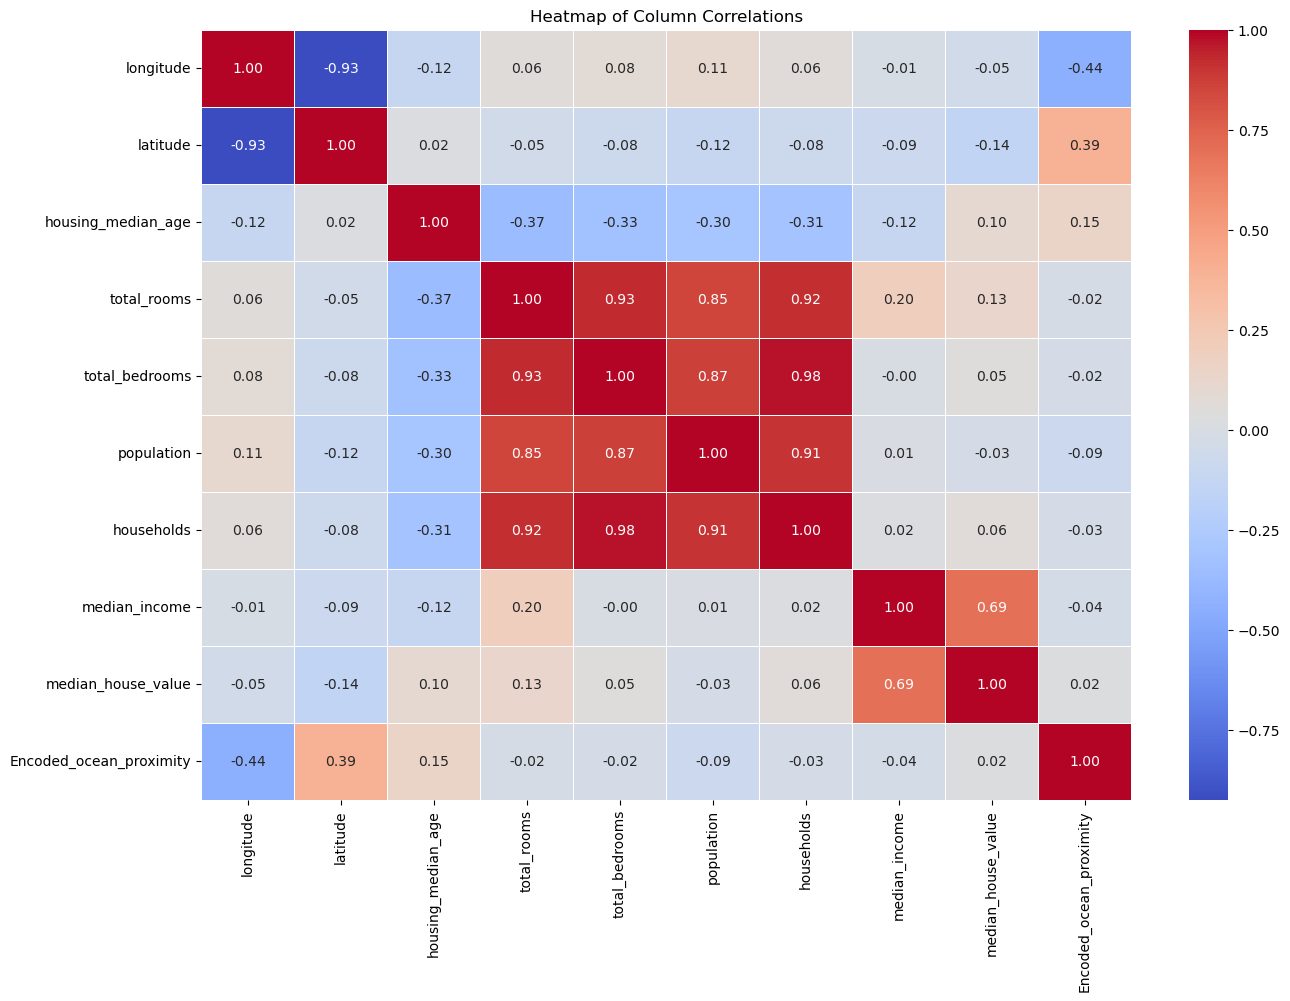

In [62]:
def visualize_heatmap(df):

    # Menghitung matriks korelasi
    correlation_matrix = df.corr()

    # Menentukan ukuran gambar
    plt.figure(figsize=(15, 10))

    # Menampilkan heatmap
    sns.heatmap(correlation_matrix,  cmap='coolwarm', annot=True,fmt='.2f', linewidths=0.5)

    # Menyesuaikan tata letak
    plt.title('Heatmap of Column Correlations')
    plt.show()

# Panggil fungsi untuk menampilkan heatmap
visualize_heatmap(data)


Menggunakan fungsi heatmap() kita dapat melihat korelasi antar fitur.

/Users/osa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/osa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/osa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


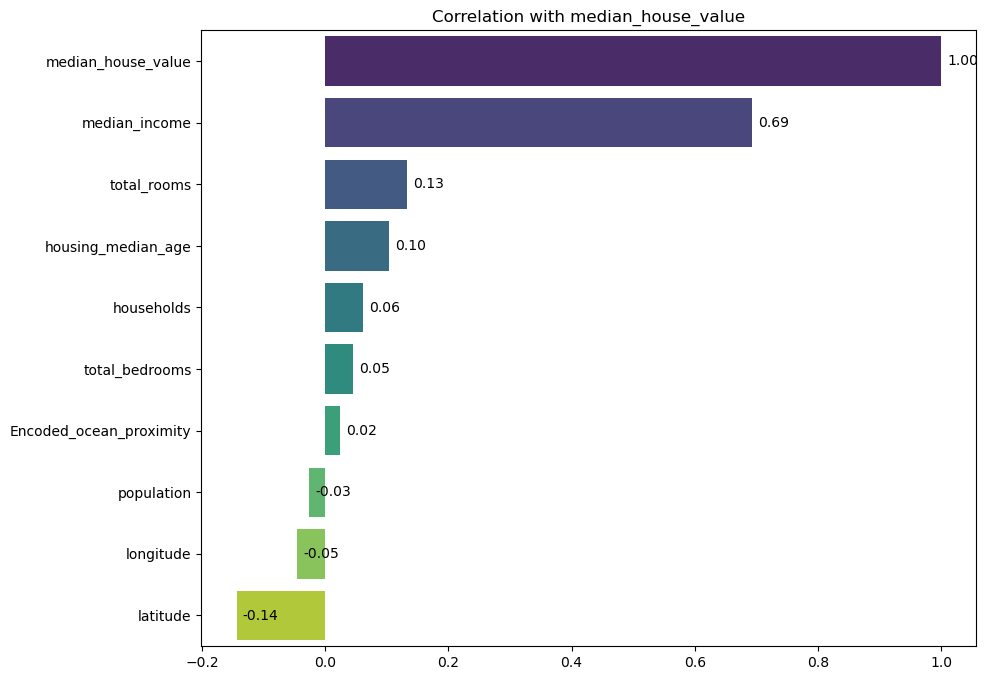

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_target_correlation(df, target_column='median_house_value'):

    # Menghitung matriks korelasi antara target_column dan semua kolom lain
    correlation_with_target = df.corr()[target_column].sort_values(ascending=False)

    # Menentukan ukuran gambar
    plt.figure(figsize=(10, 8))

    # Menampilkan bar plot korelasi dengan menambahkan nilai korelasi
    sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index, palette='viridis')

    # Menambahkan nilai korelasi pada setiap bar
    for i, value in enumerate(correlation_with_target.values):
        plt.text(value + 0.01, i, f'{value:.2f}', va='center', fontsize=10)

    # Menyesuaikan tata letak
    plt.title(f'Correlation with {target_column}')
    plt.show()

# Panggil fungsi untuk menampilkan korelasi dengan 'Close Price'
visualize_target_correlation(data)


Dengan fokus pada kolom `median_house_value`, kita dapat mengamati hasil korelasi antara kolom tersebut dan seluruh kolom lain dalam dataset.

Dari hasil diatas dapat diketahui fitur `median_house_value` berkorelasi positif kuat dengan fitur `median_income` sebesar 0.69.

## 4.2 Normalisasi Data

Normalisasi dan standarisasi adalah dua teknik prapemrosesan data yang digunakan dalam analisis data dan pembangunan model machine learning untuk menyesuaikan skala atau sebaran data. Normalisasi biasanya digunakan ketika variabel memiliki rentang nilai yang berbeda dan perlu disesuaikan agar memiliki skala yang seragam. Ini membantu menghindari dominasi variabel dengan rentang nilai besar dalam model. Standarisasi, di sisi lain, digunakan ketika distribusi variabel tidak mengikuti distribusi normal atau ketika model machine learning tertentu, seperti Support Vector Machines atau Principal Component Analysis, mengharuskan data untuk diubah menjadi distribusi normal dengan rata-rata nol dan deviasi standar satu.

Dengan normalisasi, nilai-nilai data diubah sedemikian rupa sehingga mereka berada dalam rentang antara 0 dan 1. Standarisasi, sementara itu, mengubah nilai-nilai data sedemikian rupa sehingga rata-rata menjadi 0 dan deviasi standar menjadi 1. Pemilihan antara normalisasi dan standarisasi tergantung pada karakteristik data dan persyaratan model yang digunakan.

/Users/osa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/osa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/osa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/osa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) inst

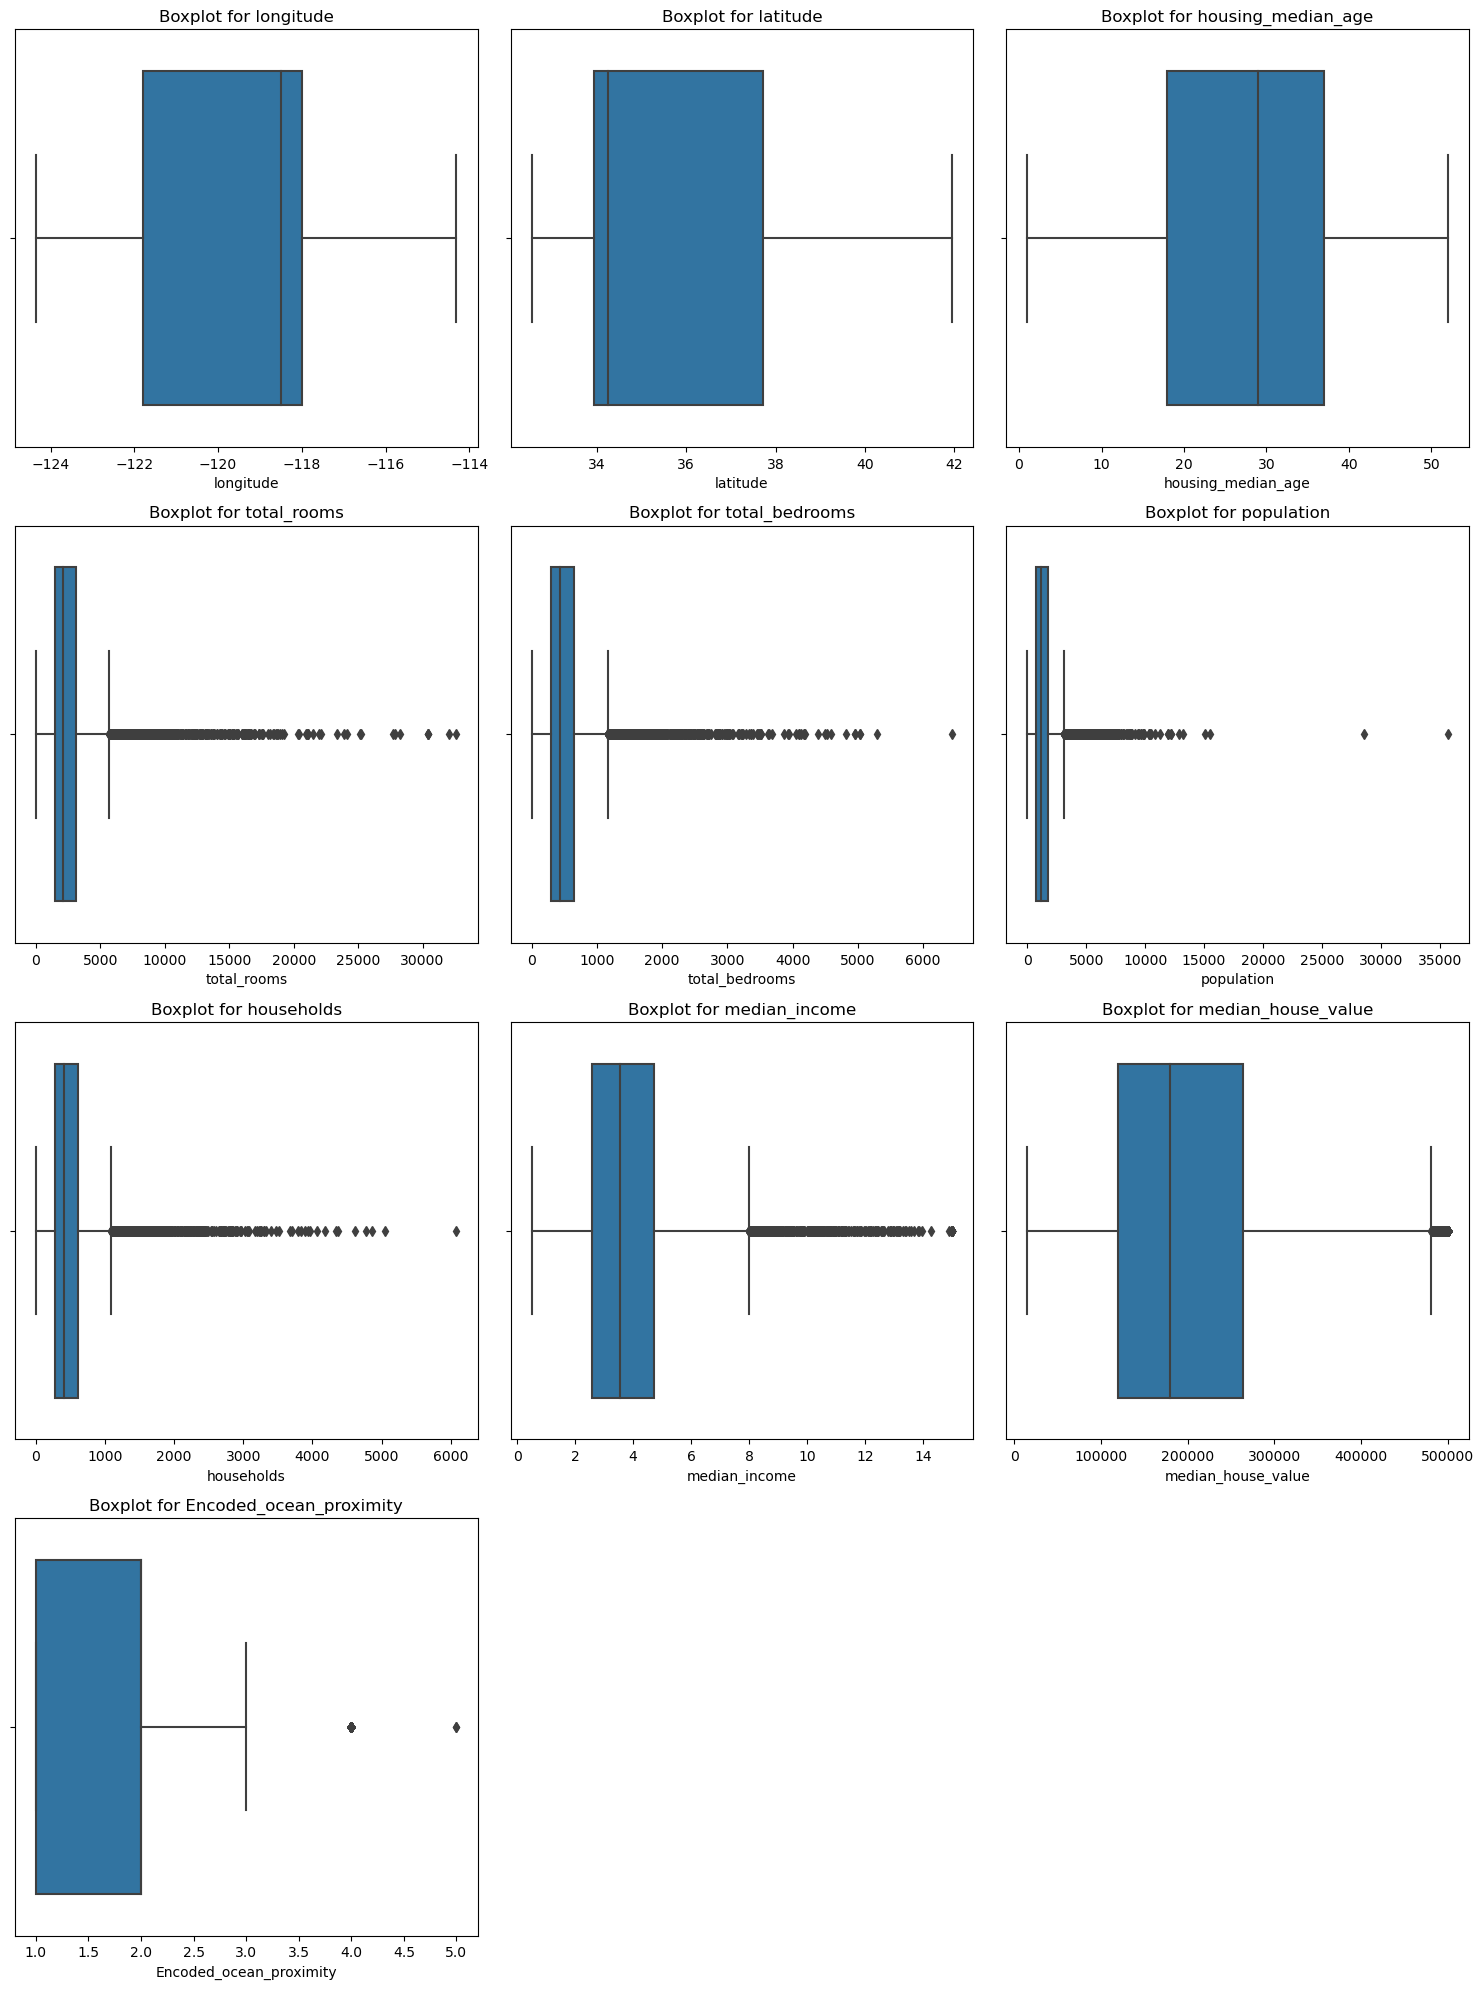

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_boxplots(df):
    # Filter hanya kolom numerik
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

    # Menentukan jumlah kolom dan baris untuk tata letak grid
    num_columns = len(numeric_columns)
    num_rows = (num_columns // 3) + (1 if num_columns % 3 > 0 else 0)

    # Menentukan ukuran gambar berdasarkan jumlah kolom
    plt.figure(figsize=(15, 5 * num_rows))

    # Menampilkan boxplot satu per satu untuk kolom numerik
    for i, column in enumerate(numeric_columns, 1):
        plt.subplot(num_rows, 3, i)
        sns.boxplot(x=df[column])
        plt.title(f'Boxplot for {column}')

    # Menyesuaikan tata letak
    plt.tight_layout()
    plt.show()

# Panggil fungsi untuk menampilkan boxplot satu per satu pada kolom numerik
visualize_boxplots(data)


Dari boxplot diatas dapat diketahui 7 dari 10 kolom memiliki outlier.

Outlier adalah nilai yang jauh atau berbeda secara signifikan dari sebagian besar nilai dalam sekumpulan data. Nilai-nilai ini dapat berada jauh di atas atau di bawah rata-rata atau nilai-nilai yang umumnya muncul dalam dataset. Outlier dapat memengaruhi hasil analisis statistik dan dapat mewakili kesalahan dalam pengumpulan data atau indikasi penting dari variasi dalam dataset. Identifikasi dan penanganan outlier dapat menjadi bagian penting dari analisis data untuk memastikan keakuratan dan interpretasi yang tepat.

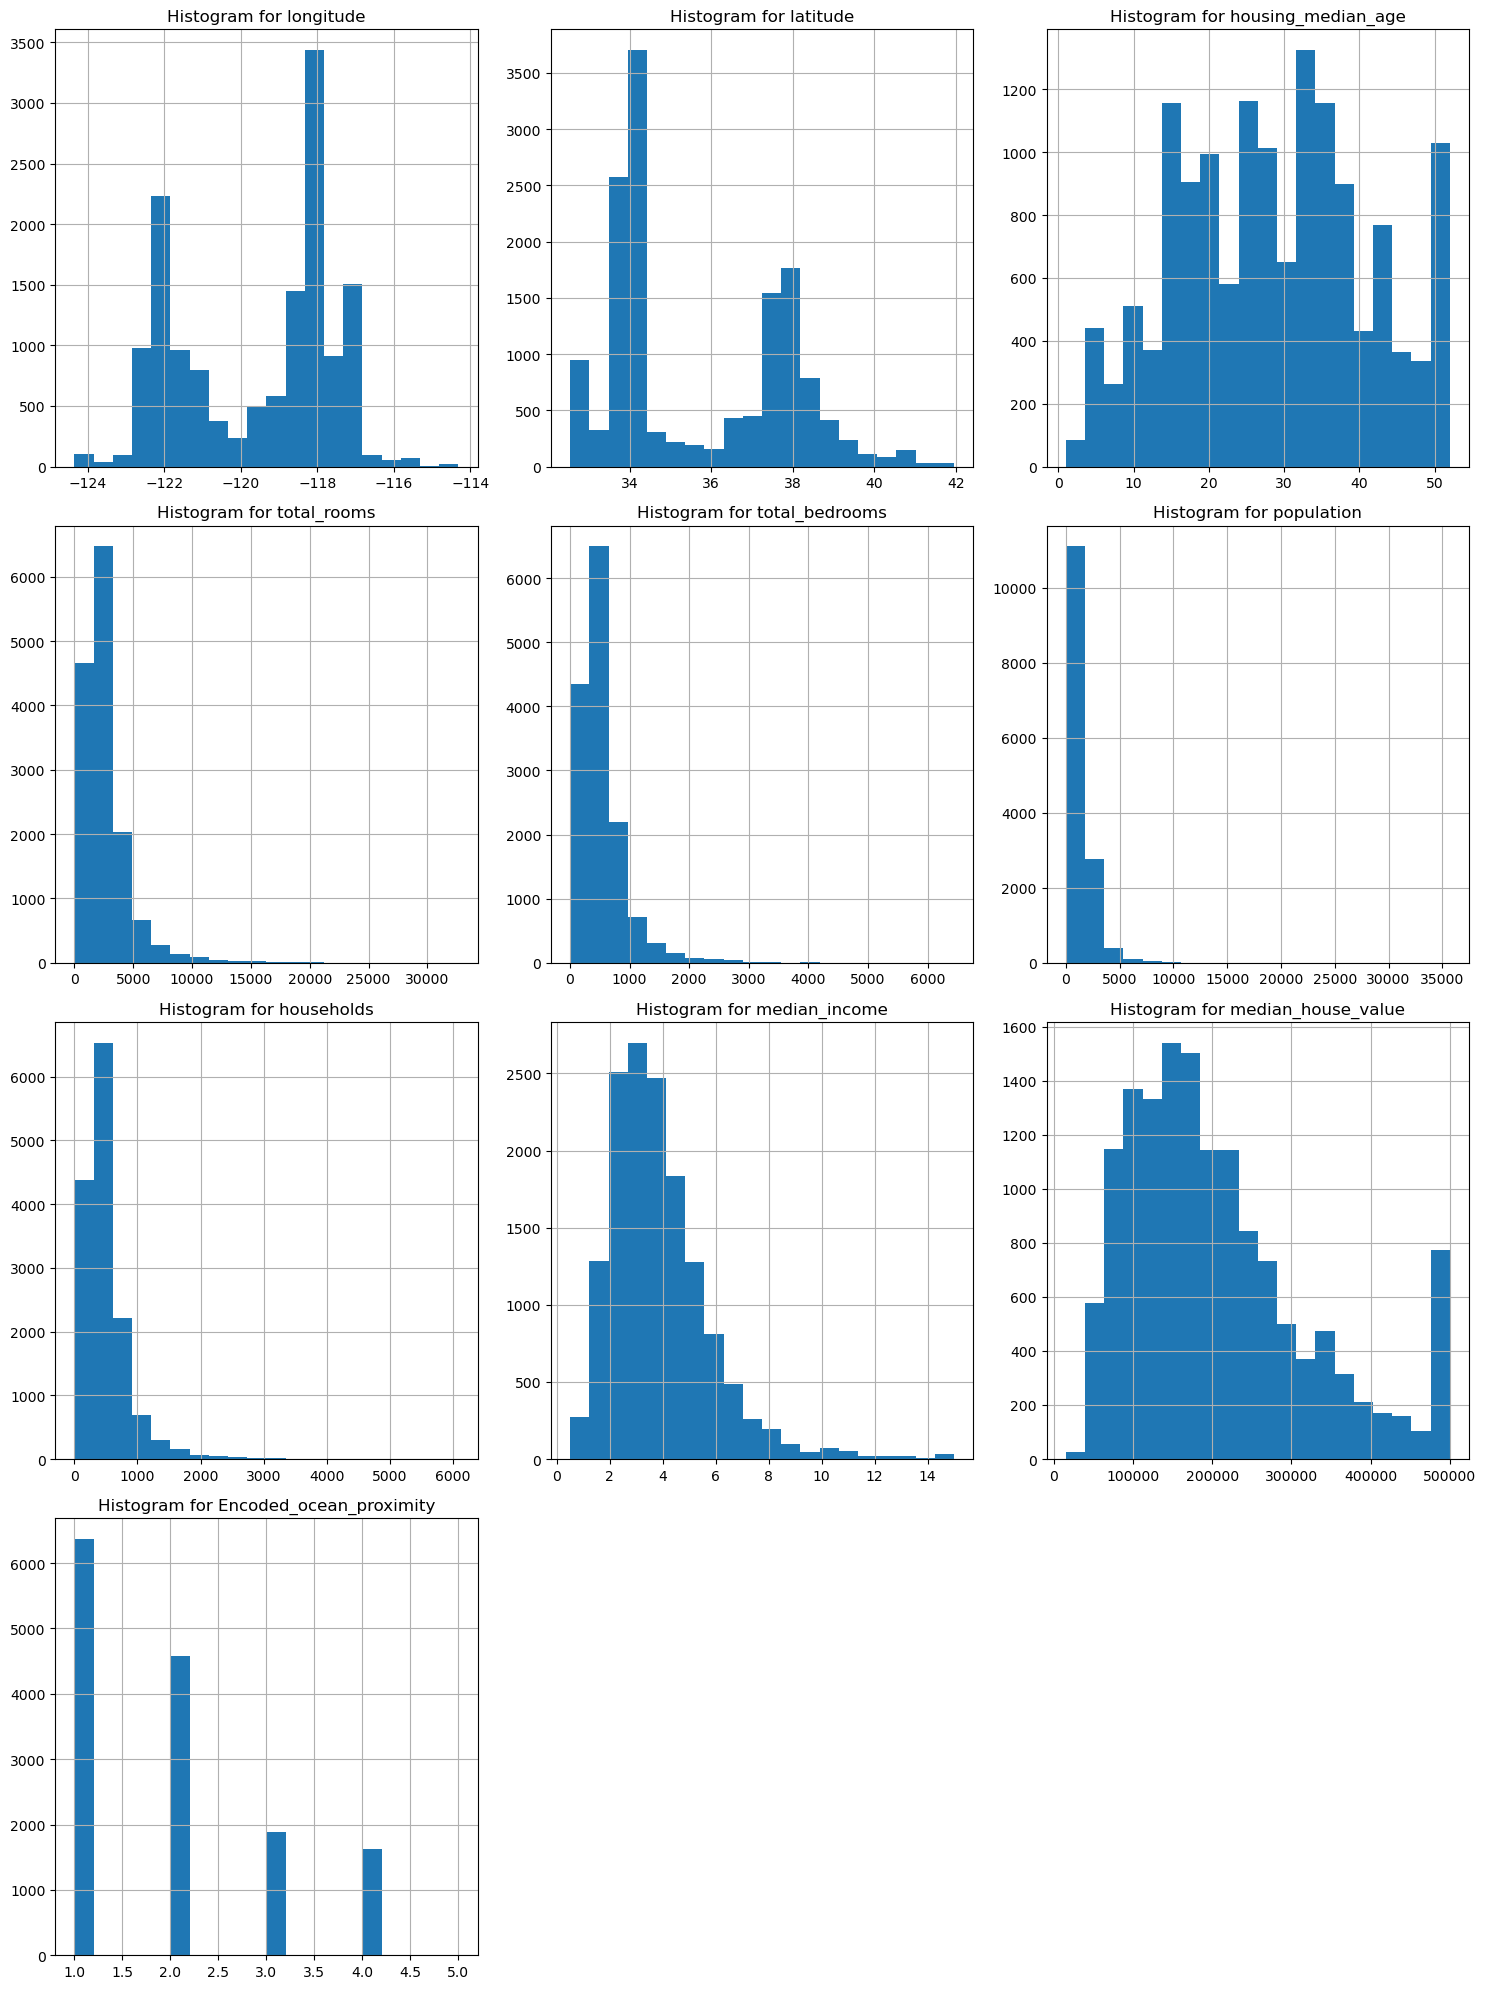

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_histograms(df):
    # Filter hanya kolom numerik
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

    # Menentukan jumlah kolom dan baris untuk tata letak grid
    num_columns = len(numeric_columns)
    num_rows = (num_columns // 3) + (1 if num_columns % 3 > 0 else 0)

    # Menentukan ukuran gambar berdasarkan jumlah kolom
    plt.figure(figsize=(15, 5 * num_rows))

    # Menampilkan histogram satu per satu untuk kolom numerik
    for i, column in enumerate(numeric_columns, 1):
        plt.subplot(num_rows, 3, i)
        df[column].hist(bins=20)
        plt.title(f'Histogram for {column}')

    # Menyesuaikan tata letak
    plt.tight_layout()
    plt.show()

# Panggil fungsi untuk menampilkan histogram satu per satu pada kolom numerik
visualize_histograms(data)


Dari histogram diatas dapat diketahui sebagian besar kolom tidak berdistribusi normal.

/Users/osa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/osa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/osa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


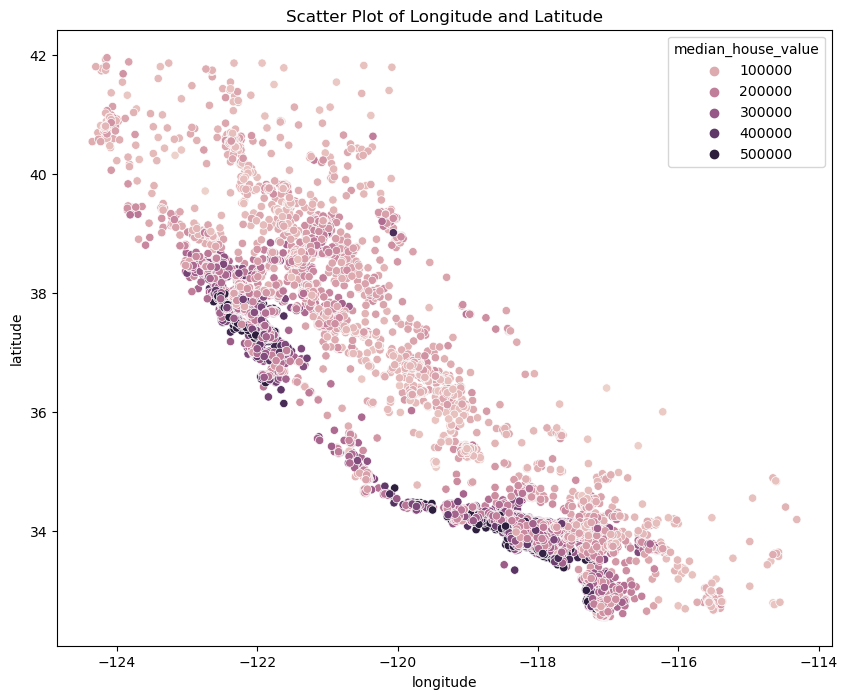

In [66]:
#scatter plot longitude and latitude
plt.figure(figsize=(10,8))
sns.scatterplot(x='longitude', y='latitude', data=data, hue='median_house_value')
plt.title('Scatter Plot of Longitude and Latitude')
plt.show()


In [67]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Encoded_ocean_proximity
count,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,-119.566647,35.630093,28.618702,2640.132683,537.281561,1425.157323,499.508929,3.866667,206824.624516,1.914175
std,2.006587,2.140121,12.596694,2191.612441,421.683154,1149.580157,383.098390,1.891158,115365.476182,1.006918
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,1.000000
25%,-121.800000,33.930000,18.000000,1451.000000,296.000000,784.000000,279.000000,2.570600,119600.000000,1.000000
50%,-118.490000,34.260000,29.000000,2125.000000,435.000000,1165.000000,410.000000,3.539100,180000.000000,2.000000
75%,-118.000000,37.710000,37.000000,3148.000000,645.000000,1724.000000,604.000000,4.736100,263900.000000,2.000000
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,5.000000


In [68]:
X = data[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'Encoded_ocean_proximity']]
Y = data['median_house_value']

In [69]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)
scaled_data

array([[-0.34210526,  0.65343915,  1.21052632, ..., -1.13846154,
        -0.72228123,  0.        ],
       [-0.97894737,  0.92857143,  0.73684211, ..., -0.40923077,
        -0.59048719,  2.        ],
       [ 0.11842105, -0.1031746 , -0.63157895, ..., -0.14153846,
         1.27448626, -1.        ],
       ...,
       [-0.89736842,  0.61375661,  0.10526316, ..., -0.05230769,
        -0.15765412,  1.        ],
       [ 0.14736842, -0.16931217,  0.26315789, ...,  0.17846154,
         0.96624336, -1.        ],
       [ 0.77105263, -0.38624339, -0.73684211, ..., -0.34461538,
        -0.99325791,  0.        ]])

Pentingnya standardisasi dalam konteks pemodelan machine learning terletak pada kemampuannya untuk menyamakan skala antar fitur dalam dataset, mengatasi masalah perbedaan skala yang dapat memengaruhi kinerja algoritma. Dengan menerapkan `StandardScaler`, kita memastikan bahwa setiap fitur memiliki distribusi yang serupa dengan rata-rata 0 dan deviasi standar 1, menjadikan proses pelatihan model lebih stabil, meningkatkan interpretasi model, dan membantu algoritma yang bergantung pada perhitungan jarak untuk mencapai konvergensi yang lebih baik. Standardisasi juga mendukung generalisasi model ke data baru dengan meminimalkan dampak perbedaan skala yang mungkin ada di antara fitur-fitur.

## 4.4 Persiapan Data

In [70]:
X_train, X_test, Y_train, Y_test = train_test_split(scaled_data, Y, test_size = 0.2, random_state = 2)

Langkah pemisahan dataset menjadi subset pelatihan (train) dan pengujian (test) menggunakan `train_test_split` memiliki tujuan untuk mengukur sejauh mana model machine learning dapat melakukan generalisasi pada data yang belum pernah dilihat sebelumnya. Dengan membagi data menjadi dua set terpisah, yaitu set pelatihan untuk melatih model dan set pengujian untuk menguji performa model, kita dapat menghindari kecenderungan model untuk hanya mempelajari pola yang ada pada data pelatihan dan memastikan bahwa model mampu menghasilkan prediksi yang baik pada data baru. Proporsi pembagian data, yang dalam kasus ini menggunakan 80% untuk pelatihan dan 20% untuk pengujian, dapat disesuaikan sesuai dengan kebutuhan spesifik proyek dan tujuan evaluasi model.

# Modeling

## Linear Regression (lr)

In [71]:
lr = LinearRegression()
# Melatih model Linear Regression
lr.fit(X_train, Y_train)
lr_predictions = lr.predict(X_test)

## Lasso

In [72]:
lasso = Lasso(random_state=42)
# Melatih model Lasso
lasso.fit(X_train, Y_train)
lasso_predictions = lasso.predict(X_test)

## Ridge

In [73]:
ridge = Ridge(random_state=42)
# Melatih model Ridge
ridge.fit(X_train, Y_train)
ridge_predictions = ridge.predict(X_test)

## ElasticNet

In [74]:
elnet = ElasticNet(random_state=42)
# Melatih model ElasticNet
elnet.fit(X_train, Y_train)
elnet_predictions = elnet.predict(X_test)

## KNeighborsRegressor

In [75]:
knn = KNeighborsRegressor()
# Melatih model KNeighborsRegressor
knn.fit(X_train, Y_train)
knn_predictions = knn.predict(X_test)

## Decision Tree Regressor (dt)

In [76]:
dt = DecisionTreeRegressor(random_state=42)
# Melatih model Decision Tree
dt.fit(X_train, Y_train)
dt_predictions = dt.predict(X_test)

## RandomForestRegressor

In [77]:
rf = RandomForestRegressor(random_state=42)
# Melatih modelRandomForestRegressor
rf.fit(X_train, Y_train)
rf_predictions = rf.predict(X_test)

## XGBoost Regressor (xgb)

In [78]:
xgb = XGBRegressor(random_state=42)
# Melatih model XGBoost
xgb.fit(X_train, Y_train)
xgb_predictions = xgb.predict(X_test)

## AdaBoostRegressor

In [79]:
ada = AdaBoostRegressor(random_state=42)
# Melatih model AdaBoostRegressor
ada.fit(X_train, Y_train)
ada_predictions = ada.predict(X_test)

## CatBoost Regressor (cat)

In [80]:
cat = CatBoostRegressor(random_state=42)
# Melatih model CatBoost
cat.fit(X_train, Y_train)
cat_predictions = cat.predict(X_test)

Learning rate set to 0.060272
0:	learn: 111108.9535080	total: 2.2ms	remaining: 2.2s
1:	learn: 107464.2847116	total: 4.01ms	remaining: 2s
2:	learn: 104199.0560685	total: 5.47ms	remaining: 1.82s
3:	learn: 101565.1417736	total: 6.87ms	remaining: 1.71s
4:	learn: 98847.5818741	total: 8.53ms	remaining: 1.7s
5:	learn: 96210.5844505	total: 10ms	remaining: 1.66s
6:	learn: 93916.4349915	total: 11.5ms	remaining: 1.63s
7:	learn: 91870.6266348	total: 13ms	remaining: 1.61s
8:	learn: 89704.1643305	total: 14.7ms	remaining: 1.61s
9:	learn: 87862.4052664	total: 16.2ms	remaining: 1.6s
10:	learn: 86026.4229982	total: 17.6ms	remaining: 1.58s
11:	learn: 84349.6261801	total: 19.1ms	remaining: 1.57s
12:	learn: 82968.7830458	total: 20.4ms	remaining: 1.55s
13:	learn: 81639.6433367	total: 21.7ms	remaining: 1.52s
14:	learn: 80111.1017025	total: 22.9ms	remaining: 1.51s
15:	learn: 78880.3957464	total: 24.3ms	remaining: 1.49s
16:	learn: 77809.2388668	total: 26.2ms	remaining: 1.51s
17:	learn: 76726.4334217	total: 27.

## Support Vector Machine Regressor (svm_model)

In [81]:
svm_model = SVR()
# Melatih model Support Vector Machine
svm_model.fit(X_train, Y_train)
svm_predictions = svm_model.predict(X_test)

# Model benchmarking

In [82]:
# Evaluasi Performa dengan MSE dan RMSE
models = [
    lr_predictions,
    lasso_predictions,
    ridge_predictions,
    elnet_predictions,
    knn_predictions,
    dt_predictions,
    rf_predictions,
    xgb_predictions,
    ada_predictions,
    cat_predictions,
    svm_predictions
]

model_names = [
    'Linear Regression',
    'Lasso',
    'Ridge',
    'ElasticNet',
    'KNN',
    'Decision Tree',
    'Random Forest',
    'XGBoost',
    'AdaBoost',
    'CatBoost',
    'SVM'
]


for i, predictions in enumerate(models):
    mse = mean_squared_error(Y_test, predictions)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((Y_test - predictions) / Y_test)) * 100
    print(f"{model_names[i]}:")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"MAPE: {mape}")
    print("="*30)

Linear Regression:
MSE: 5225682434.064118
RMSE: 72288.88181500748
MAPE: 30.583462580818217
Lasso:
MSE: 5225645599.767585
RMSE: 72288.62704303897
MAPE: 30.583361115269792
Ridge:
MSE: 5226286974.478162
RMSE: 72293.06311450747
MAPE: 30.580539685746444
ElasticNet:
MSE: 7418992236.83756
RMSE: 86133.57206593466
MAPE: 43.92165617350328
KNN:
MSE: 4115324830.987543
RMSE: 64150.79758652688
MAPE: 23.694451583568554
Decision Tree:
MSE: 5240953894.021108
RMSE: 72394.43275571063
MAPE: 25.223608622805234
Random Forest:
MSE: 2539688637.948006
RMSE: 50395.32357221259
MAPE: 18.62958678558318
XGBoost:
MSE: 2484072127.213143
RMSE: 49840.466763596254
MAPE: 18.768065141657974
AdaBoost:
MSE: 7376543796.388292
RMSE: 85886.80804633674
MAPE: 52.04734045048811
CatBoost:
MSE: 2204505371.453239
RMSE: 46952.16045565144
MAPE: 17.760664105286732
SVM:
MSE: 14307899485.001703
RMSE: 119615.63227689642
MAPE: 52.932480308442074


Dari hasil diatas kita dapat membanding hasil eror model menggunakan mse dan rmse, didapat bahwa nilai eror terkecil yaitu XGBoost dan CatBoost.Selanjutnya akan dilakukan hyperparamerer turning.

In [83]:
# cross_val

# Hyperparamerer Turning

Hyperparameter tuning adalah proses mencari kombinasi parameter yang optimal untuk meningkatkan performa model. Berikut ini penggunaan GridSearchCV untuk mencari hyperparameter yang optimal untuk model XGBoost dan CatBoost:

## Hyperparameter Turning untuk XGBoost

In [84]:
from sklearn.model_selection import RandomizedSearchCV

# Definisi model XGBoost
xgb = XGBRegressor(random_state=42)

# Hyperparameter yang akan diuji
param_grid_xgb = {
    'n_estimators': [50, 100, 200, 300, 500],
    'learning_rate': [0.01, 0.03, 0.1, 0.2],
    'max_depth': [4, 6, 8, 10],
    'subsample': [0.8, 0.9, 1.0]
}

# Inisialisasi RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid_xgb, scoring='neg_mean_squared_error', cv=5, random_state=42)

# Melakukan tuning pada dataset pelatihan
random_search_xgb.fit(X_train, Y_train)

# Menampilkan hyperparameter terbaik
print("Hyperparameter terbaik untuk XGBoost:")
print(random_search_xgb.best_params_)


Hyperparameter terbaik untuk XGBoost:
{'subsample': 1.0, 'n_estimators': 500, 'max_depth': 8, 'learning_rate': 0.03}


In [85]:
best_xgb_model = random_search_xgb.best_estimator_
xgb_predictions = best_xgb_model.predict(X_test)
xgb_mse = mean_squared_error(Y_test, xgb_predictions)
xgb_rmse = np.sqrt(xgb_mse)
xgb_mape = np.mean(np.abs((Y_test - xgb_predictions) / Y_test)) * 100
print(f"RMSE for XGBoost: {xgb_rmse}")
print(f"MAPE for XGBoost: {xgb_mape}")



RMSE for XGBoost: 48002.12484832838
MAPE for XGBoost: 17.556417968084013


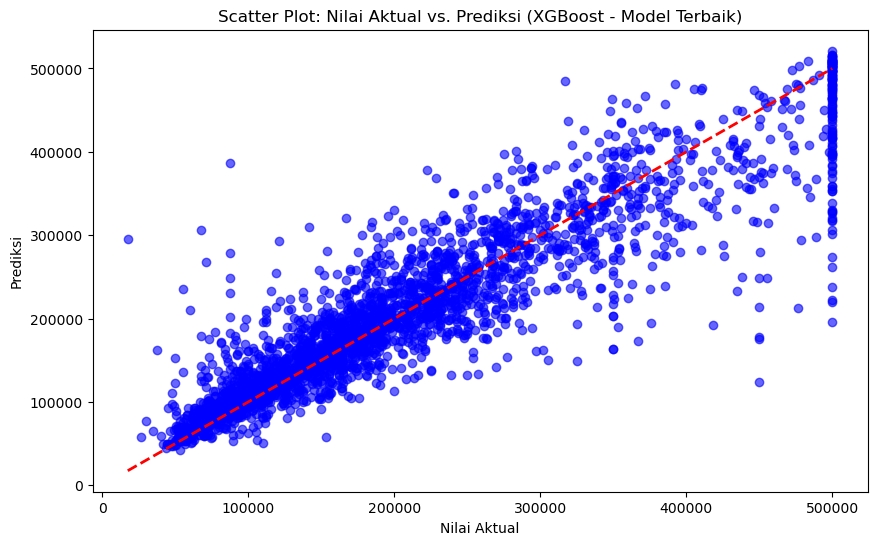

In [86]:
# Scatter plot untuk hasil prediksi model terbaik
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, xgb_predictions, color='blue', alpha=0.6)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='red', linewidth=2)
plt.title('Scatter Plot: Nilai Aktual vs. Prediksi (XGBoost - Model Terbaik)')
plt.xlabel('Nilai Aktual')
plt.ylabel('Prediksi')
plt.show()

## Hyperparameter Turning untuk CatBoost:

In [87]:
from sklearn.model_selection import RandomizedSearchCV

# Definisi model CatBoost
cat = CatBoostRegressor(random_state=42, verbose=False)

# Hyperparameter yang akan diuji
param_grid_cat = {
    'iterations': [100, 300, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [1, 4, 8, 10],
    'subsample': [0.2, 0.8, 1.0]
}

# Inisialisasi RandomizedSearchCV
random_search_cat = RandomizedSearchCV(estimator=cat, param_distributions=param_grid_cat, scoring='neg_mean_squared_error', cv=5, random_state=42, n_iter=20)

# Melakukan tuning pada dataset pelatihan
random_search_cat.fit(X_train, Y_train)

# Menampilkan hyperparameter terbaik
print("Hyperparameter terbaik untuk CatBoost:")
print(random_search_cat.best_params_)


Hyperparameter terbaik untuk CatBoost:
{'subsample': 1.0, 'learning_rate': 0.1, 'iterations': 500, 'depth': 8}


In [88]:
best_cat_model = random_search_cat.best_estimator_

In [89]:
# Prediksi dengan model terbaik
cat_predictions_best = best_cat_model.predict(X_test)

# Evaluasi performa dengan RMSE
rmse_best = np.sqrt(mean_squared_error(Y_test, cat_predictions_best))
mape_best = np.mean(np.abs((Y_test - cat_predictions_best) / Y_test)) * 100
print(f"RMSE pada data uji dengan model terbaik: {rmse_best}")
print(f"MAPE pada data uji dengan model terbaik: {mape_best:.2f}%")



RMSE pada data uji dengan model terbaik: 47500.69489981483
MAPE pada data uji dengan model terbaik: 17.80%


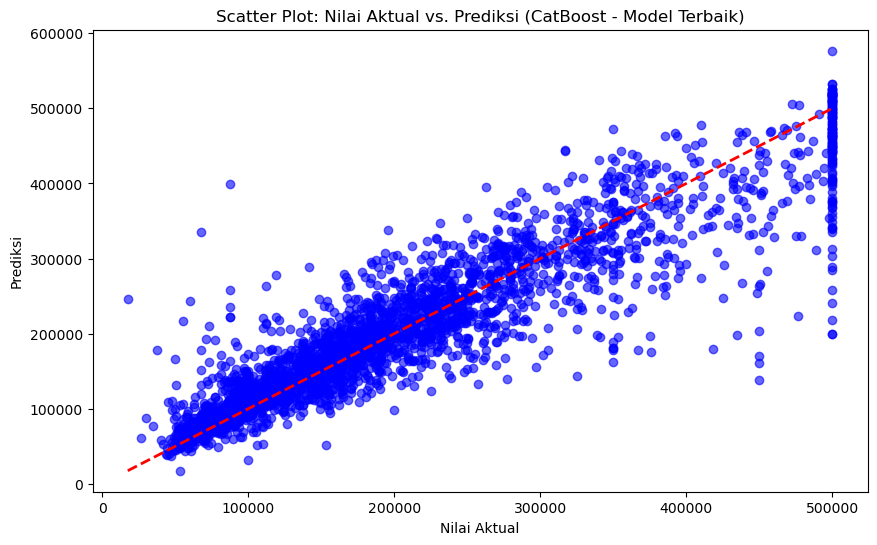

In [90]:
# Scatter plot untuk hasil prediksi model terbaik
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, cat_predictions_best, color='blue', alpha=0.6)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='red', linewidth=2)
plt.title('Scatter Plot: Nilai Aktual vs. Prediksi (CatBoost - Model Terbaik)')
plt.xlabel('Nilai Aktual')
plt.ylabel('Prediksi')
plt.show()

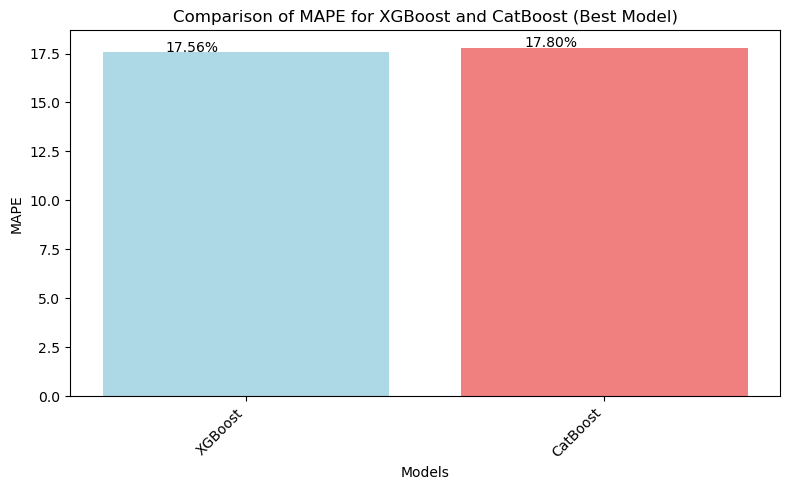

In [91]:
# MAPE values
mape_values = [xgb_mape, mape_best]

# Model names
model_names = ['XGBoost', 'CatBoost']

# Create bar chart with error values
plt.figure(figsize=(8, 5))
bars = plt.bar(model_names, mape_values, color=['lightblue', 'lightcoral'])

# Add text labels above the bars
for bar, mape in zip(bars, mape_values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.02, f"{mape:.2f}%", ha='center', color='black')

plt.xlabel('Models')
plt.ylabel('MAPE')
plt.title('Comparison of MAPE for XGBoost and CatBoost (Best Model)')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [45]:
#m

In [46]:
#prediksi harga rumah
df_pred = pd.DataFrame({
    'longitude': [-122.23],
    'latitude': [37.88],
    'housing_median_age': [41],
    'total_rooms': [880],
    'total_bedrooms': [129],
    'population': [322],
    'households': [126],
    'median_income': [8.3252],
    'Encoded_ocean_proximity': [1]
})

# Melakukan prediksi harga rumah
cat_predictions = best_cat_model.predict(df_pred)

# Menampilkan hasil prediksi
print(f"Prediksi harga rumah: {cat_predictions[0]}")


Prediksi harga rumah: 354117.51529687585


# Conclusion

Kesimpulan Proyek Prediksi Harga Rumah di California:

Proyek ini bertujuan untuk memprediksi harga rumah di California berdasarkan data sensus tahun 1990. Sejumlah model regresi dan ensambel model, termasuk Linear Regression, Lasso, Ridge, ElasticNet, KNN, Decision Tree, Random Forest, XGBoost, AdaBoost, CatBoost, dan SVM, telah diuji untuk melihat kinerjanya dalam memprediksi harga rumah.

Dari hasil evaluasi, XGBoost dan CatBoost menunjukkan kinerja yang baik dengan nilai RMSE yang lebih rendah, menandakan ketepatan prediksi yang tinggi. Kemudian, melalui proses Hyperparameter Tuning, model XGBoost berhasil dioptimalkan menjadi model terbaik dengan nilai eror yang lebih rendah dibandingkan model awal.

Kesimpulan:

1. **Pemilihan Model:**
   - Model CatBoost dan XGBoost memiliki kinerja yang paling baik dalam memprediksi harga rumah.
   - Setelah Hyperparameter Tuning, XGBOOST menjadi model terbaik dengan nilai eror yang lebih rendah.

2. **Kesimpulan Bisnis:**
   - Model prediksi harga rumah yang akurat dapat memberikan panduan harga yang baik bagi pembeli, penjual, dan pemangku kepentingan lainnya di pasar perumahan California.
   - Menyediakan estimasi harga yang akurat dapat membantu mengurangi ketidakpastian dalam transaksi properti.


# Recomendation

Rekomendasi Lebih Lanjut untuk Pengembangan Proyek Prediksi Harga Rumah di California:

Rekomendasi untuk Pengembangan Selanjutnya:

1. **Analisis Faktor Pengaruh:**
   - Melakukan analisis lebih lanjut terhadap faktor-faktor yang paling berpengaruh dalam menentukan harga rumah. Dalam hal ini, penelitian dapat difokuskan pada identifikasi dan pemahaman lebih mendalam terhadap variabel-variabel yang memiliki dampak signifikan terhadap harga properti, seperti lokasi, ukuran rumah, dan fasilitas di sekitar.

2. **Pembaruan Data:**
   - Melibatkan data yang lebih baru dan relevan untuk meningkatkan keakuratan prediksi. Mengupdate dataset dengan data terkini akan membantu model untuk tetap relevan dengan kondisi pasar properti yang selalu berubah.

3. **Peningkatan Kualitas Data:**
   - Melakukan pembersihan data yang lebih mendalam untuk mengidentifikasi dan menangani outlier, serta mengatasi nilai-nilai yang hilang dengan metode yang lebih canggih. Hal ini akan membantu memastikan kebersihan dan integritas data, yang sangat penting untuk hasil prediksi yang akurat.

4. **Analisis Korelasi:**
   - Melakukan analisis korelasi lebih mendalam untuk memahami hubungan antara variabel-variabel yang ada. Hal ini dapat membantu dalam mengidentifikasi pola-pola kompleks dan memahami bagaimana variabel-variabel saling berinteraksi.

5. **Feature Engineering:**
   - Mengeksplorasi opsi feature engineering tambahan, seperti pembuatan fitur baru atau transformasi fitur yang dapat meningkatkan kemampuan model dalam menangkap pola kompleks dalam data. Pemilihan fitur yang cerdas dapat meningkatkan keakuratan dan interpretabilitas model.

Dengan mengambil langkah-langkah ini, proyek prediksi harga rumah di California dapat terus diperbaiki untuk memberikan hasil prediksi yang lebih akurat dan relevan dengan keadaan terkini di pasar properti.

# Save model

In [47]:
import pickle

# Menyimpan model ke dalam file
# with open('catboost_model.pkl', 'wb') as model_file:
#     pickle.dump(best_cat_model, model_file)